<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW #10: Recommender Systems

<span style="color:blue; font-size: 12pt">Andrey Saitgalin </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'"> andrey.saitgalin@gmail.com </span>

<h1 align="center">Organization Info</h1> 

* Дедлайн **18 декабря 23:59** для всех групп.
* В качестве решения задания нужно прислать ноутбук с подробными комментариями (<span style='color:red'> без присланного решения результат контеста не будет засчитан </span>).
* <span style='color:red'>Название команды в контесте должно соответствовать шаблону: НомерГруппы_Имя_Фамилия, например, 494_Ivan_Ivanov</span>.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task10.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``


--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было.

<h1 align="center">Contest (100%)</h1> 
* Ссылка на контест: https://www.kaggle.com/t/f37413eb448145acba822f3a8c43946d

## acquiring data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
links = pd.read_csv('ml-20m/links.csv')

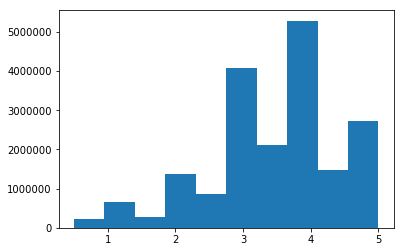

In [9]:
plt.hist(train.iloc[:,0])
plt.show()

In [3]:
train.head()

,rating,movieId,userId
0,3.0,2158,10953099004185006703
1,3.5,12959,10953099004185006703
2,3.5,7808,10953099004185006703
3,4.0,9049,4762492897681260571
4,3.0,12363,2110017552365950661


## glove

In [3]:
w2v_gl = {}

In [4]:
def l2dict(l):
    spl = l.split()
    w2v_gl[spl[0]] = np.array(spl[1:len(spl)]).astype('float32')

In [5]:
with open('glove.6B.300d.txt') as f:
    for l in f.readlines():
        l2dict(l)

In [6]:
def get_sen_vector(sen):
    v = np.zeros(300)
    er_rate = 0
    for w in sen:
        if w in w2v_gl:
            v = np.add(v, w2v_gl[w])
        else:
            er_rate += 1
        
    #print(er_rate / (len(sen) + 0.001))
    return v

## getting embeddings for movie description

In [3]:
def get_tmdbid(mid):
    tid = links[links['movieId'] == mid]
    if len(tid) == 0:
        return 0
    return tid.iloc[0,2]

In [4]:
def mid2emb(mid):
    tmdbid = get_tmdbid(mid)
    #print(tmdbid)
    if tmdbid == 0:
        return np.zeros(300)
    desc = fetch_desc_by(str(tmdbid))
    #print(desc)
    v = get_sen_vector(desc.split())
    return v

In [5]:
import requests

In [6]:
desc_cache = {}

In [7]:
def write_cache_to_file(path):
    with open(path,'w') as f:
        f.write('id,desc\n')
        for k in desc_cache.keys():
            f.write(k + ',' + desc_cache[k] + '\n')
        

In [8]:
write_cache_to_file('dump_full.txt')

In [28]:
desc_cache = get_cache_from('dump_full.txt')

1
empty description for - Written by James Meek

1
empty description for Combining a vicious sense of humor with hard-talking drama, the film reaches into the hearts and minds of the chemical generation, casting a dark and unholy light into the hidden corners of the human psyche.

1
empty description for Directed by Paul McGuigan, the film dramatises three stories from the book: 1- The Granton Star Cause, 2- A Soft Touch &amp; 3- The Acid House.

1
empty description for As the main character, The Chosen One, Oedekerk sets off to avenge the deaths of his parents at the hands of kung-fu legend Master Pain. Along the way, he encounters some strange characters

1
empty description for But this film is not about the story, it's all about style. Alain Resnais has an original approach in this film and this is the thing that makes this film worth watching.



In [27]:
def get_cache_from(path):
    res = {}
    with open(path,'r') as f:
        i = 0
        for l in f.readlines()[1:]:
            if i == 0:
                i+=1 # to skip first line
                continue
                
            spl = l.split('.0,')
            if len(spl) == 2:
                res[spl[0]] = spl[1]
            else:
                print(len(spl))
                print('empty description for' + l)
                
            
            i+= 1
            
    return res

In [11]:
def fetch_desc_by(f_id):
    if f_id in desc_cache:
        return desc_cache[f_id]
    else:
        json = requests.get('https://api.themoviedb.org/3/movie/'+f_id+'?api_key=b0da6cc7b6f4069733a9a354e88a0c15&language=en-US').json()
        #print(json)
        if 'overview' in json:
            desc_cache[f_id] = json['overview']
            return json['overview']
        else:
            return ''

## test

In [29]:
mid2emb(2158)

0.1489330014255016


array([ -7.34990799e+00,   2.42860108e+00,  -1.97077790e+00,
        -8.68629114e+00,  -1.17168404e+00,  -3.66019599e-01,
        -2.42990897e+00,  -2.33048601e+00,   6.01431495e+00,
        -5.85443700e+01,   1.61643567e+00,  -6.79365993e-01,
        -6.28049724e-01,   4.12783558e+00,  -4.78267444e-01,
         8.80576103e+00,  -7.06184797e+00,  -1.03390258e+00,
         2.79761464e+00,  -1.06080951e-01,  -1.30586996e+00,
         7.59241212e+00,   4.44083199e+00,   4.87678316e+00,
        -9.03617491e+00,  -4.21011153e+00,   3.63220404e+00,
         1.68983126e-01,  -1.24398504e+00,   3.32109995e+00,
        -1.70758998e+00,   8.70545208e+00,  -2.21492563e+00,
         8.18687496e+00,  -3.54871850e+01,   5.45675214e+00,
        -2.79978913e+00,   2.92194136e+00,  -7.55339594e+00,
        -1.45064600e+00,   3.69572673e-01,  -3.10054994e-01,
        -8.08720993e-01,  -1.57634107e+00,   2.69234205e+00,
         5.21684112e+00,   8.08670418e+00,   5.98066381e+00,
        -3.22499403e+00,

## model, regression over description embeddings, disregarding user

In [30]:
train.head()

,rating,movieId,userId
0,3.0,2158,10953099004185006703
1,3.5,12959,10953099004185006703
2,3.5,7808,10953099004185006703
3,4.0,9049,4762492897681260571
4,3.0,12363,2110017552365950661


In [12]:
rat = train.drop(['userId', 'movieId'], axis=1)

In [27]:
2158 in links['movieId']

True

In [24]:
links[links['tmdbId'] == 12959]

,movieId,imdbId,tmdbId


In [38]:
len(links[links['movieId']==12959])

0

In [25]:
write_cache_to_file('dump_full.txt')

In [24]:
embs = {}

i = 0

for row in train.iterrows():
    mid = int(row[1][1])
    if mid not in embs.keys():
        i += 1
        embs[mid] = (mid2emb(mid))
        if i % 1000 == 0:
            print('dumping to file')
            write_cache_to_file('dump_' + str(i) + ".txt")
    

dumping to file
dumping to file
dumping to file
dumping to file
dumping to file
dumping to file
dumping to file
dumping to file
dumping to file
dumping to file
dumping to file
dumping to file
dumping to file
dumping to file
dumping to file
dumping to file
dumping to file
dumping to file


## training model

In [33]:
trainX = []

In [34]:
for row in train.iterrows():
    mid = int(row[1][1])
    trainX.append(embs[mid])

In [35]:
train.head(2)

,rating,movieId,userId
0,3.0,2158,10953099004185006703
1,3.5,12959,10953099004185006703


In [39]:
import gc

In [50]:
del desc_cache
del embs
gc.collect()

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f2f9c073ef0>>
Traceback (most recent call last):
  File "/home/dev/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


347

In [56]:
trainY = np.array(train.iloc[1:100000,0])
trainX = np.array(trainX[1:100000])

In [57]:
from sklearn.model_selection import train_test_split

In [67]:
tx,vx,ty,vy = train_test_split(trainX, trainY, test_size = 0.3)

In [66]:
vy

array([ 4. ,  3.5,  3. , ...,  4.5,  5. ,  4. ])

## model

In [45]:
import xgboost as xgb

/home/dev/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [69]:
dtrain = xgb.DMatrix(tx,ty)
dval = xgb.DMatrix(vx,vy)

In [70]:

param = {'silent':1, 'objective':'reg:linear' }
param['nthread'] = 4
param['eval_metric'] = 'rmse'
param['eta'] = 0.075
param['max_depth'] = 5
param['silent'] = 1
param['n_estimators'] = 2000
param['early_stopping_rounds'] = 30

watchlist = [ (dtrain,'train'), (dval, 'val') ]

In [71]:
bst = xgb.train(param, dtrain, 1000, watchlist,verbose_eval=100)

[0]	train-rmse:2.8319	val-rmse:2.83141
[100]	train-rmse:0.966275	val-rmse:0.988629
[200]	train-rmse:0.93716	val-rmse:0.970924
[300]	train-rmse:0.922196	val-rmse:0.964058
[400]	train-rmse:0.913662	val-rmse:0.96109
[500]	train-rmse:0.907896	val-rmse:0.960156
[600]	train-rmse:0.90369	val-rmse:0.959933
[700]	train-rmse:0.900523	val-rmse:0.960361
[800]	train-rmse:0.898155	val-rmse:0.960593
[900]	train-rmse:0.896274	val-rmse:0.961199


In [72]:
bst.save_model('300_w2v_xgb_2000estim.mdl')

## doing filtering in batches

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD

In [3]:
FB_SIZE = 10000
LEN = test.shape[0]
BATCH_NUM = int(LEN / FB_SIZE)
B_RES = FB_SIZE * BATCH_NUM

In [10]:
summary_mse = 0
for i in range(0, BATCH_NUM):
    start = i * FB_SIZE
    end = (i+1) * FB_SIZE
        
    matrix = pd.concat([train.iloc[start:end],test[start:end]]).pivot('userId','movieId','rating')
    movie_means = matrix.mean()
    user_means = matrix.mean(axis=1)
    mzm = matrix-movie_means
    mz = mzm.fillna(0)
    mask = -mzm.isnull()


    iteration = 0
    mse_last = 999
    while iteration<10:
        iteration += 1
        svd = TruncatedSVD(n_components=15,random_state=42)
        svd.fit(mz)
        mzsvd = pd.DataFrame(svd.inverse_transform(svd.transform(mz)),columns=mz.columns,index=mz.index)

        mse = mean_squared_error(mzsvd[mask].fillna(0),mzm[mask].fillna(0))
        #print('%i %.5f %.5f'%(iteration,mse,mse_last-mse))
        mzsvd[mask] = mzm[mask]

        mz = mzsvd
        if summary_mse-mse<0.01: break
        mse_last = mse
        summary_mse += mse_last


    print('doing', start, end, 'mse', mse)

        
    m = mz+movie_means
    m = m.clip(lower=1,upper=5)

    test['rating'] = test[start:end].apply(lambda x:m[m.index==x.userId][x.movieId].values[0],axis=1)

    # There are some movies who did not have enough info to make prediction, so just used average value for user
    missing = np.where(test[start:end].rating.isnull())[0]
    test.ix[missing,'rating'] = user_means[test.loc[missing].userId].values

doing 0 10000 mse 6.76679283418e-05
doing 10000 20000 mse 6.60046698511e-05
doing 20000 30000 mse 6.83247908226e-05
doing 30000 40000 mse 6.80753651784e-05
doing 40000 50000 mse 6.69501334162e-05
doing 50000 60000 mse 6.78043258424e-05
doing 60000 70000 mse 6.51266581119e-05
doing 70000 80000 mse 6.34228959068e-05
doing 80000 90000 mse 6.6632486488e-05
doing 90000 100000 mse 6.7597774893e-05
doing 100000 110000 mse 6.82653338163e-05
doing 110000 120000 mse 6.29741454907e-05
doing 120000 130000 mse 6.68777464304e-05
doing 130000 140000 mse 6.72097882164e-05
doing 140000 150000 mse 6.63117021861e-05
doing 150000 160000 mse 7.08849327524e-05
doing 160000 170000 mse 6.42945949613e-05
doing 170000 180000 mse 6.43395214626e-05
doing 180000 190000 mse 6.47802773786e-05
doing 190000 200000 mse 6.5431351415e-05
doing 200000 210000 mse 6.6462152635e-05
doing 210000 220000 mse 6.6218587505e-05
doing 220000 230000 mse 6.58203216386e-05
doing 230000 240000 mse 6.61716597028e-05
doing 240000 250000 

In [11]:
start = B_RES
end = LEN

matrix = pd.concat([train.iloc[start:end],test[start:end]]).pivot('userId','movieId','rating')
movie_means = matrix.mean()
user_means = matrix.mean(axis=1)
mzm = matrix-movie_means
mz = mzm.fillna(0)
mask = -mzm.isnull()


iteration = 0
mse_last = 999
while iteration<10:
    iteration += 1
    svd = TruncatedSVD(n_components=15,random_state=42)
    svd.fit(mz)
    mzsvd = pd.DataFrame(svd.inverse_transform(svd.transform(mz)),columns=mz.columns,index=mz.index)

    mse = mean_squared_error(mzsvd[mask].fillna(0),mzm[mask].fillna(0))
    print('%i %.5f %.5f'%(iteration,mse,mse_last-mse))
    mzsvd[mask] = mzm[mask]

    mz = mzsvd
    if mse_last-mse<0.00001: break
    mse_last = mse

m = mz+movie_means
m = m.clip(lower=1,upper=5)

test[start:end]['rating'] = test[start:end].apply(lambda x:m[m.index==x.userId][x.movieId].values[0],axis=1)

# There are some movies who did not have enough info to make prediction, so just used average value for user
missing = np.where(test.rating.isnull())[0]
test.ix[missing,'rating'] = user_means[test.loc[missing].userId].values

1 0.00009 998.99991
2 0.00008 0.00000


/home/dev/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [45]:
test.head()

,movieId,userId,rating
0,939,3128775406573976678,4.000000
1,19,6058877902987009152,2.428571
2,1213,2787275058272728238,3.666667
3,1141,14199414671932452776,3.000000
4,2935,5958052843391945803,3.750000


In [47]:
test.index += 1

In [12]:
tmp = test.fillna(3.0)

In [59]:
tmp.iloc[164]

movieId    3.429000e+03
userId     1.453082e+19
rating     3.000000e+00
Name: 165, dtype: float64

In [14]:
tmp.to_csv('svd_subm.csv', index=True, columns=['rating'], header=True, index_label=['Id'])

In [52]:
test.shape

(969451, 3)

## doing submission

In [ ]:
embs = {}

i = 0

for row in train.iterrows():
    mid = int(row[1][1])
    if mid not in embs.keys():
        i += 1
        embs[mid] = (mid2emb(mid))
        if i % 1000 == 0:
            print('dumping to file')
            write_cache_to_file('dump_' + str(i) + ".txt")
    

In [84]:
def do_pred(e):
    m = xgb.DMatrix(e)
    return bst.predict(m)

In [85]:
test_embs = {}
desc_cache = {}

preds = []

for r in test.iterrows():
    mid = int(r[1][0])
    if mid not in test_embs.keys():
        i += 1
        test_embs[mid] = (mid2emb(mid))
        if i % 1000 == 0:
            p rint('dumpnig to file')
            write_cache_to_file('test_dump' + str(i) + ".txt")
    
    e = np.array(test_embs[mid]).reshape(1,300)
    preds.append(do_pred(e))
        

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f2f920d1128>>
Traceback (most recent call last):
  File "/home/dev/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f2f92118a20>>
Traceback (most recent call last):
  File "/home/dev/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


dumpnig to file
dumpnig to file
dumpnig to file
dumpnig to file
dumpnig to file
dumpnig to file
dumpnig to file


Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f2f92f78710>>
Traceback (most recent call last):
  File "/home/dev/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f2f9c073c50>>
Traceback (most recent call last):
  File "/home/dev/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


dumpnig to file
dumpnig to file
dumpnig to file
dumpnig to file
dumpnig to file


In [99]:
subm = test.drop(['userId'],axis=1)

In [100]:
subm['rating'] = np.array(preds)

In [102]:
subm.index += 1

In [103]:
subm.to_csv('submission.csv', index=True, columns=['rating'],header=['rating'])

In [95]:
subm.head()

,movieId,rating
0,939,3.848868
1,19,2.596153
2,1213,3.856700
3,1141,3.359594
4,2935,3.672021


In [96]:
subm.drop_duplicates(subset='movieId', inplace=True)

## average of desc and svd

In [70]:
xgb_p = pd.read_csv('submission.csv')
svd_p = pd.read_csv('svd_subm.csv')

In [90]:
con = pd.concat((xgb_p, svd_p), axis=1)

In [91]:
con = con.drop(['Id'],axis=1)

In [92]:
con['rmean'] = con.mean(axis=(1))

In [93]:
con.head()

,rating,rating1,rmean
0,3.848868,4.000000,3.924434
1,2.596153,2.428571,2.512362
2,3.856700,3.666667,3.761683
3,3.359594,3.000000,3.179797
4,3.672021,3.750000,3.711011


In [96]:
con.index += 1

In [97]:
con.to_csv('mean_subm.csv', index=True, index_label='Id', columns=['rmean'], header=['rating'])